In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math
from scipy.optimize import fsolve

In [2]:
adj = 0.95
out = 'probability_LTME.pdf'

f1 = np.logspace(-1, -6, num=1000)
r1 = [16,23,29,31,47,100,110,216,340] #[3, 6, 17, 34, 67]
d1 = 30
d_range1 = 0

p2 = np.linspace(0.9, 0.99, 5)
d_range2 = 0

r3 = 100
r_range3 = 5

p4 = np.linspace(0.9, 0.99, num=1000)
r4 = [16,23,29,31,47,100,110,216,340] #[3, 6, 17, 34, 67]
d4 = 30
d_range4 = 0

In [3]:
def prob(f, r, d):
    prod = d * r
    dec = (1 - f) ** (prod)
    return 1 - adj * dec

def reg(x, f, d, p):
    return 1 - adj * ((1 - f) ** (x * d)) - p

def depth(x, f, r, p):
    return 1 - adj * ((1 - f) ** (x * r)) - p

def f_val(x, d, r, p):
    return 1 - adj * ((1 - x) ** (d * r)) - p

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in power
  # Remove the CWD from sys.path while we load stuff.
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in power
  # Remove the CWD from sys.path while we load stuff.
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)
/Library/Frameworks/Python.framework/Versions/3.6/lib/

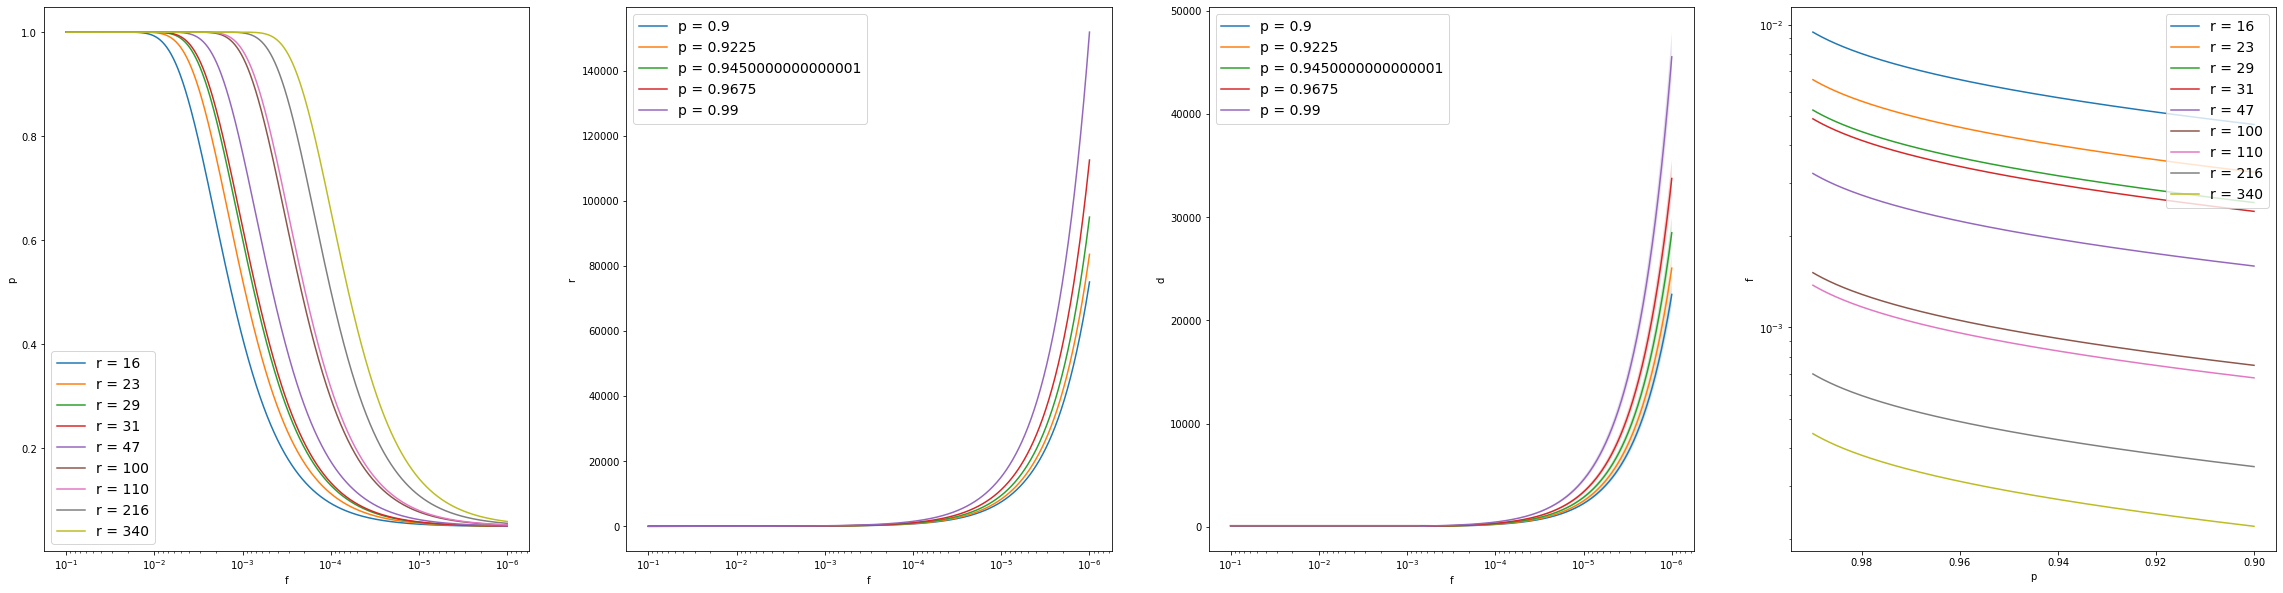

In [4]:
fig, axs = plt.subplots(1, 4, figsize=(40, 10))

for i in range(len(r1)):
    axs[0].plot(f1, prob(f1, r1[i], d1), label='r = ' + str(r1[i]))
    axs[0].fill_between(f1, prob(f1, r1[i], d1 - d_range1), prob(f1, r1[i], d1 + d_range1), alpha=0.2)

axs[0].legend(fontsize=14, loc='lower left')
axs[0].set(xlabel='f', ylabel='p')
axs[0].set_xscale('log')
axs[0].invert_xaxis()

for i in range(len(p2)):
    y_ax = np.zeros(len(f1))
    y_min = np.zeros(len(f1))
    y_max = np.zeros(len(f1))
    for j in range(len(f1)):
        sol = fsolve(reg, 0.5, args=(f1[j], d1, p2[i]))
        sol_min = fsolve(reg, 0.5, args=(f1[j], d1 - d_range2, p2[i]))
        sol_max = fsolve(reg, 0.5, args=(f1[j], d1 + d_range2, p2[i]))
        y_ax[j] = sol[0]
        y_min[j] = sol_min[0]
        y_max[j] = sol_max[0]
    
    axs[1].plot(f1, y_ax, label='p = ' + str(p2[i]))
    axs[1].fill_between(f1, y_min, y_max, alpha=0.2)

axs[1].legend(fontsize=14, loc='upper left')
axs[1].set(xlabel='f', ylabel='r')
axs[1].set_xscale('log')
axs[1].invert_xaxis()

for i in range(len(p2)):
    y_ax = np.zeros(len(f1))
    y_min = np.zeros(len(f1))
    y_max = np.zeros(len(f1))
    for j in range(len(f1)):
        sol = fsolve(depth, 100, args=(f1[j], r3, p2[i]))
        sol_min = fsolve(depth, 100, args=(f1[j], r3 - r_range3, p2[i]))
        sol_max = fsolve(depth, 100, args=(f1[j], r3 + r_range3, p2[i]))
        y_ax[j] = sol[0]
        y_min[j] = sol_min[0]
        y_max[j] = sol_max[0]
    
    axs[2].plot(f1, y_ax, label='p = ' + str(p2[i]))
    axs[2].fill_between(f1, y_min, y_max, alpha=0.2)

axs[2].legend(fontsize=14, loc='upper left')
axs[2].set(xlabel='f', ylabel='d')
axs[2].set_xscale('log')
axs[2].invert_xaxis()

for i in range(len(r4)):
    y_ax = np.zeros(len(p4))
    y_min = np.zeros(len(p4))
    y_max = np.zeros(len(p4))
    for j in range(len(p4)):
        sol = fsolve(f_val, 0.000001, args=(d4, r4[i], p4[j]))
        sol_min = fsolve(f_val, 0.000001, args=(d4 - d_range4, r4[i], p4[j]))
        sol_max = fsolve(f_val, 0.000001, args=(d4 + d_range4, r4[i], p4[j]))
        y_ax[j] = sol[0]
        y_min[j] = sol_min[0]
        y_max[j] = sol_max[0]
    
    axs[3].plot(p4, y_ax, label='r = ' + str(r4[i]))
    axs[3].fill_between(p4, y_min, y_max, alpha=0.2)

axs[3].legend(fontsize=14, loc='upper right')
axs[3].set(xlabel='p', ylabel='f')
axs[3].set_yscale('log')
axs[3].invert_xaxis()

fig.savefig(out,dpi=300, bbox_inches='tight')